## Distribución Normal

Una v.a. $X$ tiene distribución normal o gaussiana de parámetros $\mu$ y $\sigma$, $X \sim \mathcal{N(\mu,\sigma)}$ si su función de densidad es.

$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}\hspace{2em} \forall x \in \mathbb{R}$$

La gráfica de $f_X$ es conocida como la **Campana de Gauss** Cuando $\mu = 0$ y $\sigma = 1$, diremos que la v.a. $X$ es **estándar** y la indicaremos como $Z$, la cual tendrá función de densidad.


$$f_Z(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} \hspace{2em} \forall z \in \mathbb{R}$$

*   **Esperanza** $E(X) = \mu$

*   **Varianza** $Var(X) = \sigma^2$

En particular, si $Z$ sigue una distribución estándar,

*   **Esperanza** $E(X) = 0$

*   **Varianza** $Var(X) = 1$

$$\;$$

El código de la distribución Normal:

*   En `R` tenemos las funciones del paquete `stats:dnomr(x,mean, sd),         pnorm(q,mean,sd), qnorm(p,mean,sd), rnorm(n,mean,sd)` donde `mean` es      la media y `sd` es la desviación estándar de la normar $N(\mu,\sigma)$          
*  En `Python` tenemos las funciones del paquete `scipy.stats.norm:           pdf(k,mu,scale), cdf(k,mu,scale), ppf(q,mu,scale),rvs(n,mu,scale)` donde    `mu` es la media y `scale` es la desviación estándar de la normal          $N(\mu,\sigma)$


**Estandarización de una v.a normal**. Si $X$ es una $N(\mu,\sigma)$, entonces.

$$Z = \frac{X-\mu}{\sigma} \sim N(\mu = 0,\sigma = 1)$$

Las probabilidades de una normal estándar $Z$ determinan las de cualquier $X$ de tipo $\mathcal{N(\mu = 0,\sigma = 1)}$:

$$p(X \leq x) = p\left(\frac{X-\mu}{\sigma} \leq \frac{x-\mu}{\sigma}\right) = p\left(Z \leq \frac{x-\mu}{\sigma}\right)$$

$F_Z$ la funcion de distribucion no tiene una expresión conocida. Se puede calcular con cualquier programa, como por ejemplo `R`, o bien a mano utilizando las `tablas de la $N(0,1)$`, Con las tablas se pueden calcular tanto probabilidades como cuantiles.

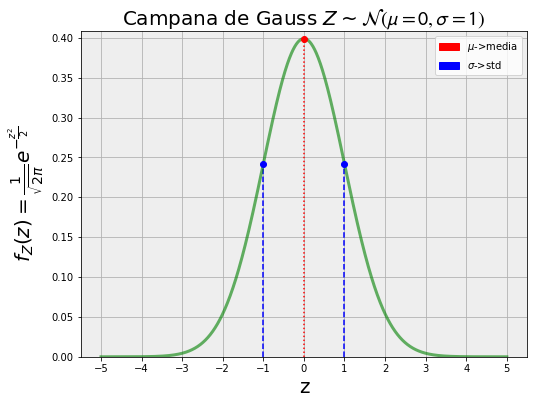

Media 0.000000
Varianza 1.000000
Sesgo 0.000000
Curtosis 0.000000


In [178]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

mu = 0
sigma = 1

rv = norm(loc = mu, scale = sigma)
mean, var, skew, kurt = rv.stats(moments='mvsk')

fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(-5,5,1000)
ax.plot(x, rv.pdf(x),'g-',lw = 3,alpha = 0.6)
ax.plot(mean,rv.pdf(mean),'ro')
ax.vlines(mean,0,rv.pdf(mean),linestyles ="dotted", colors = 'r',label='media')
ax.plot(mean-np.sqrt(var),rv.pdf(np.sqrt(var)),'bo',label='std')
ax.plot(mean+np.sqrt(var),rv.pdf(np.sqrt(var)),'bo')
ax.vlines(mean-np.sqrt(var),0,rv.pdf(np.sqrt(var)),linestyles ="dashed", colors = 'b')
ax.vlines(mean+np.sqrt(var),0,rv.pdf(np.sqrt(var)),linestyles ="dashed", colors = 'b')


plt.ylim(0,rv.pdf(mean)+0.01)
plt.title(r'Campana de Gauss $Z \sim \mathcal{N(\mu=0,\sigma=1)}$', fontsize = 20)
plt.xlabel('z', fontsize=20)
plt.ylabel(r'$f_Z(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$', fontsize= 20)

mu_lab = mpatches.Patch(color='red', label=r'$\mu$->media')
sigma_lab = mpatches.Patch(color='blue', label=r'$\sigma$->std')
plt.legend(handles=[mu_lab,sigma_lab])
plt.grid(True)
plt.xticks(range(-5,6))
ax.set_facecolor(('#EEEEEE'))
plt.savefig('Gauss-Bell.png')
plt.show()

print("Media %f" %mean)
print("Varianza %f" %var)
print("Sesgo %f" %skew)
print("Curtosis %f" %kurt)

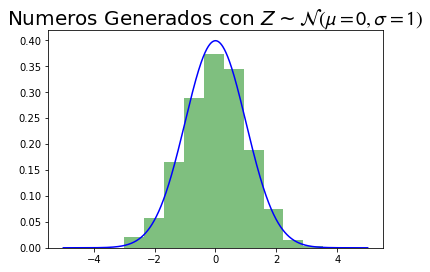

In [175]:
r = rv.rvs(1000)
x = r
fig, ax = plt.subplots(1,1)
ax.hist(r, density = True, histtype = 'stepfilled', alpha = 0.5, facecolor='g')
x = np.linspace(-5,5,1000)
ax.plot(x,rv.pdf(x),'b-')
plt.title(r"Numeros Generados con $Z \sim \mathcal{N(\mu=0,\sigma=1)}$",fontsize=20)
plt.show()